<a href="https://colab.research.google.com/github/mana9512/bank-term-deposit-prediction/blob/main/Bank_Term_Deposit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Data Cleaning and Feature Selection
  by Manashree Patel



In this assignment, you will use a dataset for predictive learning and check the quality of the data and determine which features are important.

Answer the following questions:

* What are the data types? (Only numeric and categorical) ✅

* Are there missing values? ✅

* What are the likely distributions of the numeric variables? ✅

* Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)✅

* Which independent variables have missing data? How much?✅

* Do the training and test sets have the same data?✅

* In the predictor variables independent of all the other predictor variables?✅

* Which predictor variables are the most important?✅

* Do the ranges of the predictor variables make sense?

* What are the distributions of the predictor variables?   

* Remove outliers and keep outliers (does if have an effect of the final predictive model)?

* Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

For categorical data, calculate the accuracy and a confusion matrix.

# **Dataset Used :** *Bank Term Deposit Predictions*

***link :*** [https://www.kaggle.com/datasets/thedevastator/bank-term-deposit-predictions?rvi=1](https://www.kaggle.com/datasets/thedevastator/bank-term-deposit-predictions?rvi=1)

---

# **About Dataset :**

This dataset, titled Direct Marketing Campaigns for Bank Term Deposits, is a collection of data related to the direct marketing campaigns conducted by a Portuguese banking institution. These campaigns primarily involved phone calls with customers, and the objective was to determine whether or not a customer would subscribe to a term deposit offered by the bank.


---

# **Features :**

The dataset contains various features that provide insights into customer attributes and campaign outcomes. These features include:

**Age**: The age of the customer.

**Job**: The occupation of the customer.

**Marital Status**: The marital status of the customer.

**Education**: The education level of the customer.

**Default**: Whether or not the customer has credit in default.

**Balance**: The balance of the customer's account.

**Housing Loan**: Whether or not the customer has a housing loan.

**Contact Communication Type**: The method used to contact the customer (e.g., telephone, cellular).

**Day**: The day of the month when the last contact with the customers was made.

**Duration**: The duration (in seconds) of the last contact with customers during a campaign.

**Campaign Contacts Count**: Number of contacts performed during this campaign for each customer.

**pdays** : number days passed since previously contacted form previous camapign

**poutcome** : outcome from previous marketing campaign

The purpose behind this dataset is to train a predictive model that can determine if a given customer will subscribe to a term deposit based on these various features.

# ***Data Preprocessing***


---
Data preprocessing is a process that takes raw data and transforms it into a format that can be understood and analyzed by computers and machine learning.


> STEPS IN DATA PREPROCESSING

1. **Data collection**
Initially, data collection is performed by gathering raw data from diverse sources, ensuring its accuracy and relevance
2. **Data cleaning and missing value imputation**
 Subsequently, data cleaning takes place, addressing tasks like removing duplicates, correcting errors, and handling missing values through techniques such as mean imputation or linear interpolation.
3. **Data transformation and normalization**
Following this, data transformation and normalization occur, where the data is converted into a more suitable form for analysis, including tasks like scaling and encoding categorical variables.
4. **Data reduction and feature selection**
Lastly, the process involves data reduction and feature selection, identifying and selecting the most relevant features while eliminating redundant or irrelevant ones using techniques like dimensionality reduction or feature selection algorithms.



# **Step 1: Importing the required Libraries**

In [ ]:
!pip install scikit-learn==1.4.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 24.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from mlxtend.feature_selection import SequentialFeatureSelector
from xgboost import plot_importance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report



# **Step 2: Importing the Dataset**

In [ ]:
#read the csv
df_train_original = pd.read_csv('https://raw.githubusercontent.com/mana9512/bank-term-deposit-prediction/main/train.csv')
df_test_original = pd.read_csv('https://raw.githubusercontent.com/mana9512/bank-term-deposit-prediction/main/test.csv')

In [ ]:
df_train_original.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
print("Number of rows in training dataset: ", df_train_original.shape[0])
print("Number of columns in training dataset: ", df_train_original.shape[1])


Number of rows in training dataset:  45211
Number of columns in training dataset:  17


In [ ]:
df_test_original.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
print("Number of rows in test dataset: ", df_test_original.shape[0])
print("Number of columns in test dataset: ", df_test_original.shape[1])

Number of rows in test dataset:  4521
Number of columns in test dataset:  17


In [ ]:
df_train_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


***Q. What are the data types? (Only numeric and categorical)***

> Ans. There are **7 Numeric** and **9 Categorical** features.




In [ ]:
df_train_original.dtypes


age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [ ]:
numerical_columns = df_train_original.select_dtypes("int64").columns
categorical_columns = df_train_original.select_dtypes("object").columns
numerical_columns = list(numerical_columns)
categorical_columns= list(categorical_columns)

print("Numerical Columns", numerical_columns)
print("Categorical Columns", categorical_columns)

Numerical Columns ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
Categorical Columns ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


In [ ]:
unique = set(list(df_train_original.dtypes))
unique

{dtype('int64'), dtype('O')}

***Q. Are there missing values?***

> Ans. There are **no missing values** found




In [ ]:
df_train_original.isnull().sum()


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
df_test_original.isnull().sum()


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

***Q. What are the likely distributions of the numeric variables?***

> Ans.  **A kernel density estimate (KDE) plot** is a method for visualizing the distribution of observations in a dataset.

Below are KDE plots of numeric features:










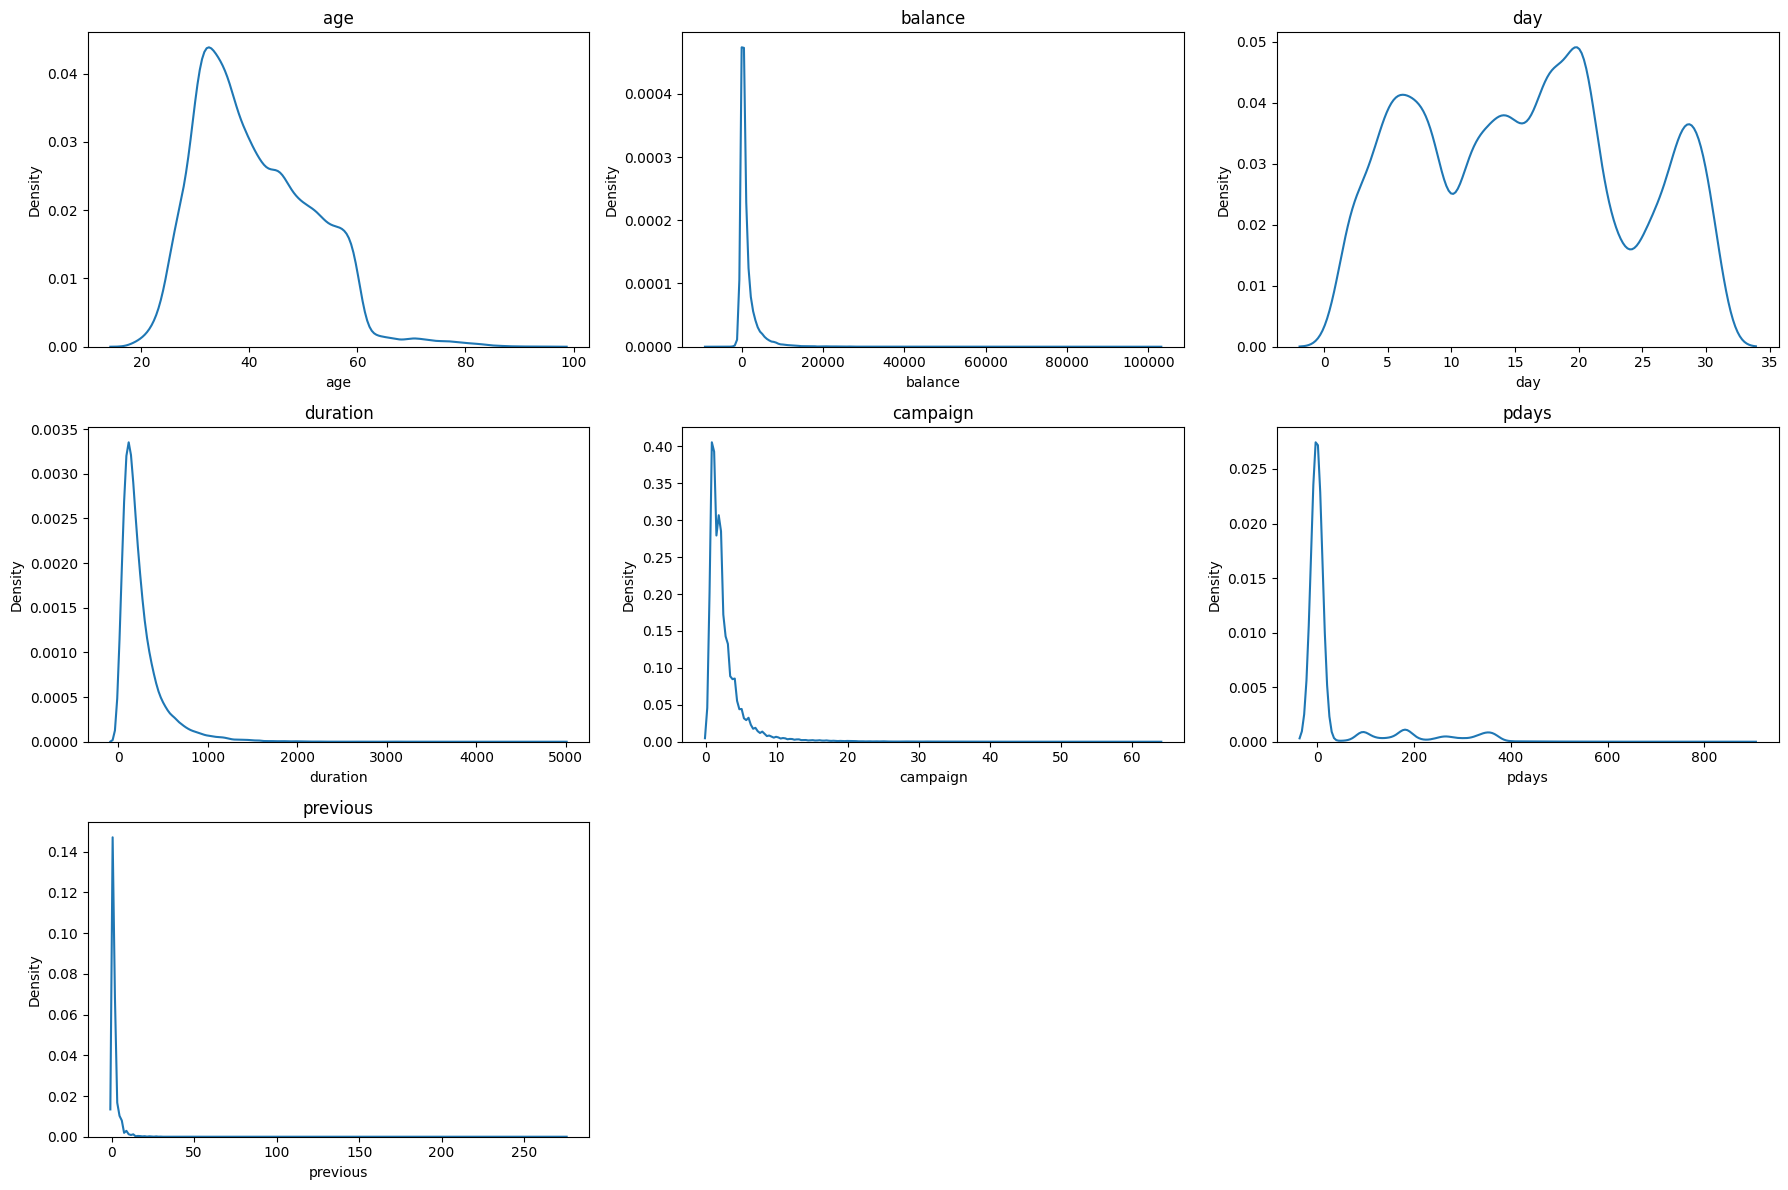

In [ ]:
#extract numerical features from dataset
numeric_features = df_train_original.select_dtypes('int64').columns

fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()

# Plot KDE for each numeric feature in the grid
for i, numeric_feature in enumerate(numeric_features):
    sns.kdeplot(data=df_train_original[numeric_feature], ax=axes[i])
    axes[i].set_title(numeric_feature)

for j in range(i+1, len(axes)):
  axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

Ans.

***Examining data distributions using QQ plots***

Points on the **Normal QQ plot** provide an indication of univariate normality of the dataset. If the data is normally distributed, the points will fall on the 45-degree reference line. If the data is not normally distributed, the points will deviate from the reference line

Below are the QQ plots of numeric features :


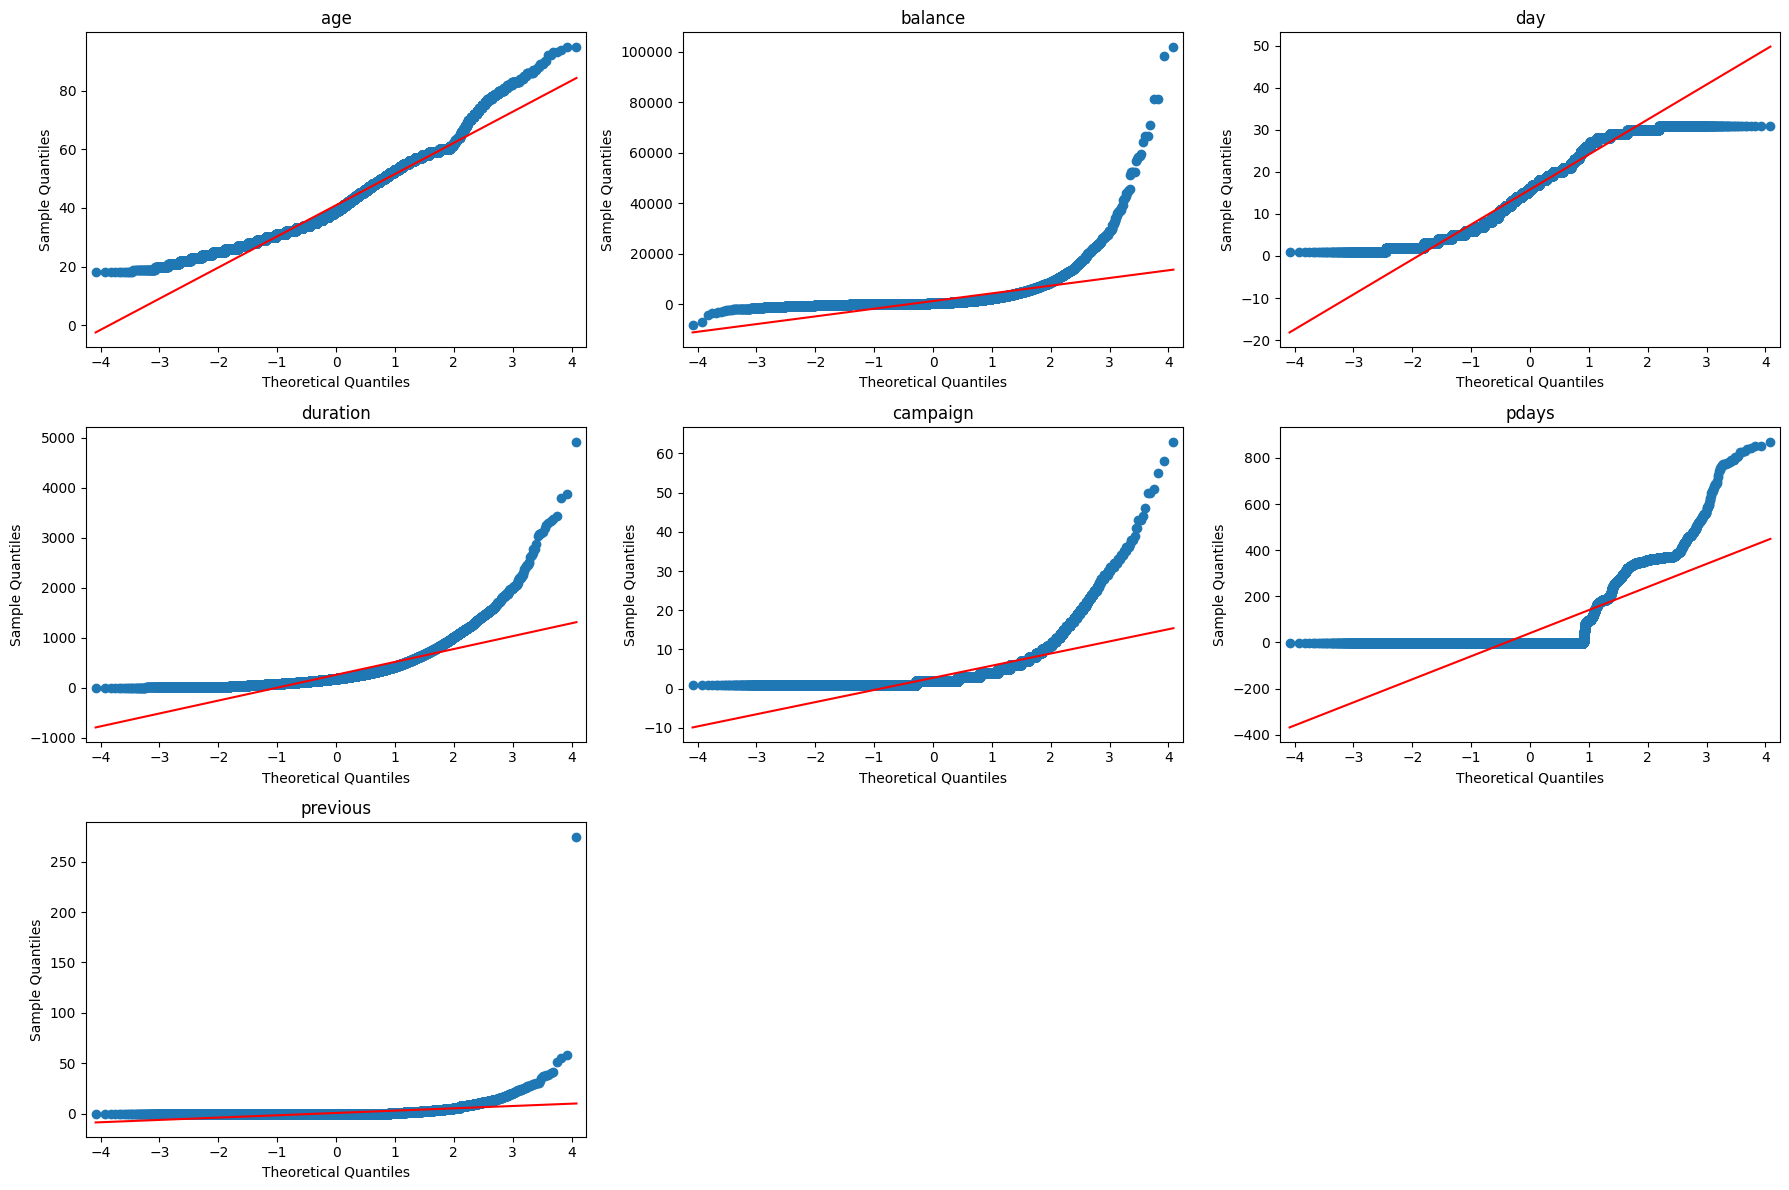

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()

# Plot Q-Q plot for each numeric feature in the grid
for i, numeric_feature in enumerate(numeric_features):
  sm.qqplot(df_train_original[numeric_feature], line='s', ax=axes[i])
  axes[i].set_title(numeric_feature)

for j in range(i+1, len(axes)):
  axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()





*   Age, Previous -  Light tailed
*   Balance, Campaign, Duration - right skewed
*   Day, Pdays - Bi modal
*   Balance - right skewed







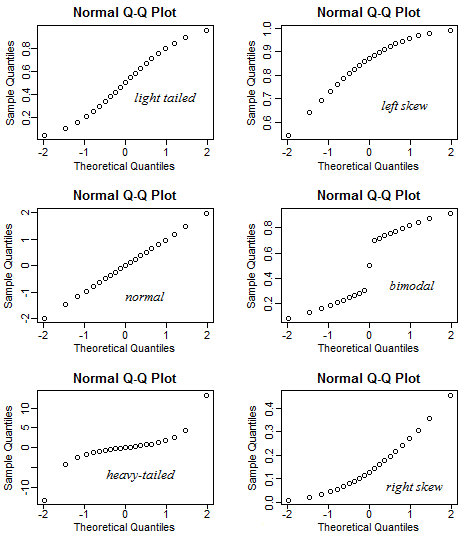

# ***Step 3: Feature Selection***


***Q. Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)***

# ***Encoding***


In [ ]:
#Encoded categorial using label encoder technique
label_encoder = LabelEncoder()
df_train = df_train_original.copy()
df_test = df_test_original.copy()

categorical_features = df_train.select_dtypes('object').columns
for feature in categorical_features:
  df_train[feature] = label_encoder.fit_transform(df_train[feature])


categorical_features = df_test.select_dtypes('object').columns
for feature in categorical_features:
  df_test[feature] = label_encoder.fit_transform(df_test[feature])

In [ ]:
df_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


In [ ]:
df_test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,0,-333,1,0,0,30,5,329,5,-1,0,3,0
4517,57,6,1,2,1,-3313,1,1,2,9,8,153,1,-1,0,3,0
4518,57,9,1,1,0,295,0,0,0,19,1,151,11,-1,0,3,0
4519,28,1,1,1,0,1137,0,0,0,6,3,129,4,211,3,1,0


In [ ]:
#extract independent variables
X_train =  df_train.drop('y', axis=1)
#extract target variable
y_train = df_train['y']


X_test =  df_test.drop('y', axis=1)
#extract target variable
y_test = df_test['y']

In [ ]:
X_train.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [ ]:
X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3


In [ ]:
X_test.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [ ]:
X_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3


In [ ]:
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

# **Feature Scaling**

> MinMaxScaler is a machine learning preprocessing technique that adjusts a feature set to a specified range, commonly between 0 and 1. The process involves subtracting the minimum value of each feature from its data points and dividing the outcome by the range (the difference between the maximum and minimum values). The primary objective of this normalization is to standardize all features to a uniform scale, particularly advantageous for algorithms that assign weights to inputs, such as neural networks. This normalization ensures that no single feature dominates others in magnitude, contributing to enhanced model performance.




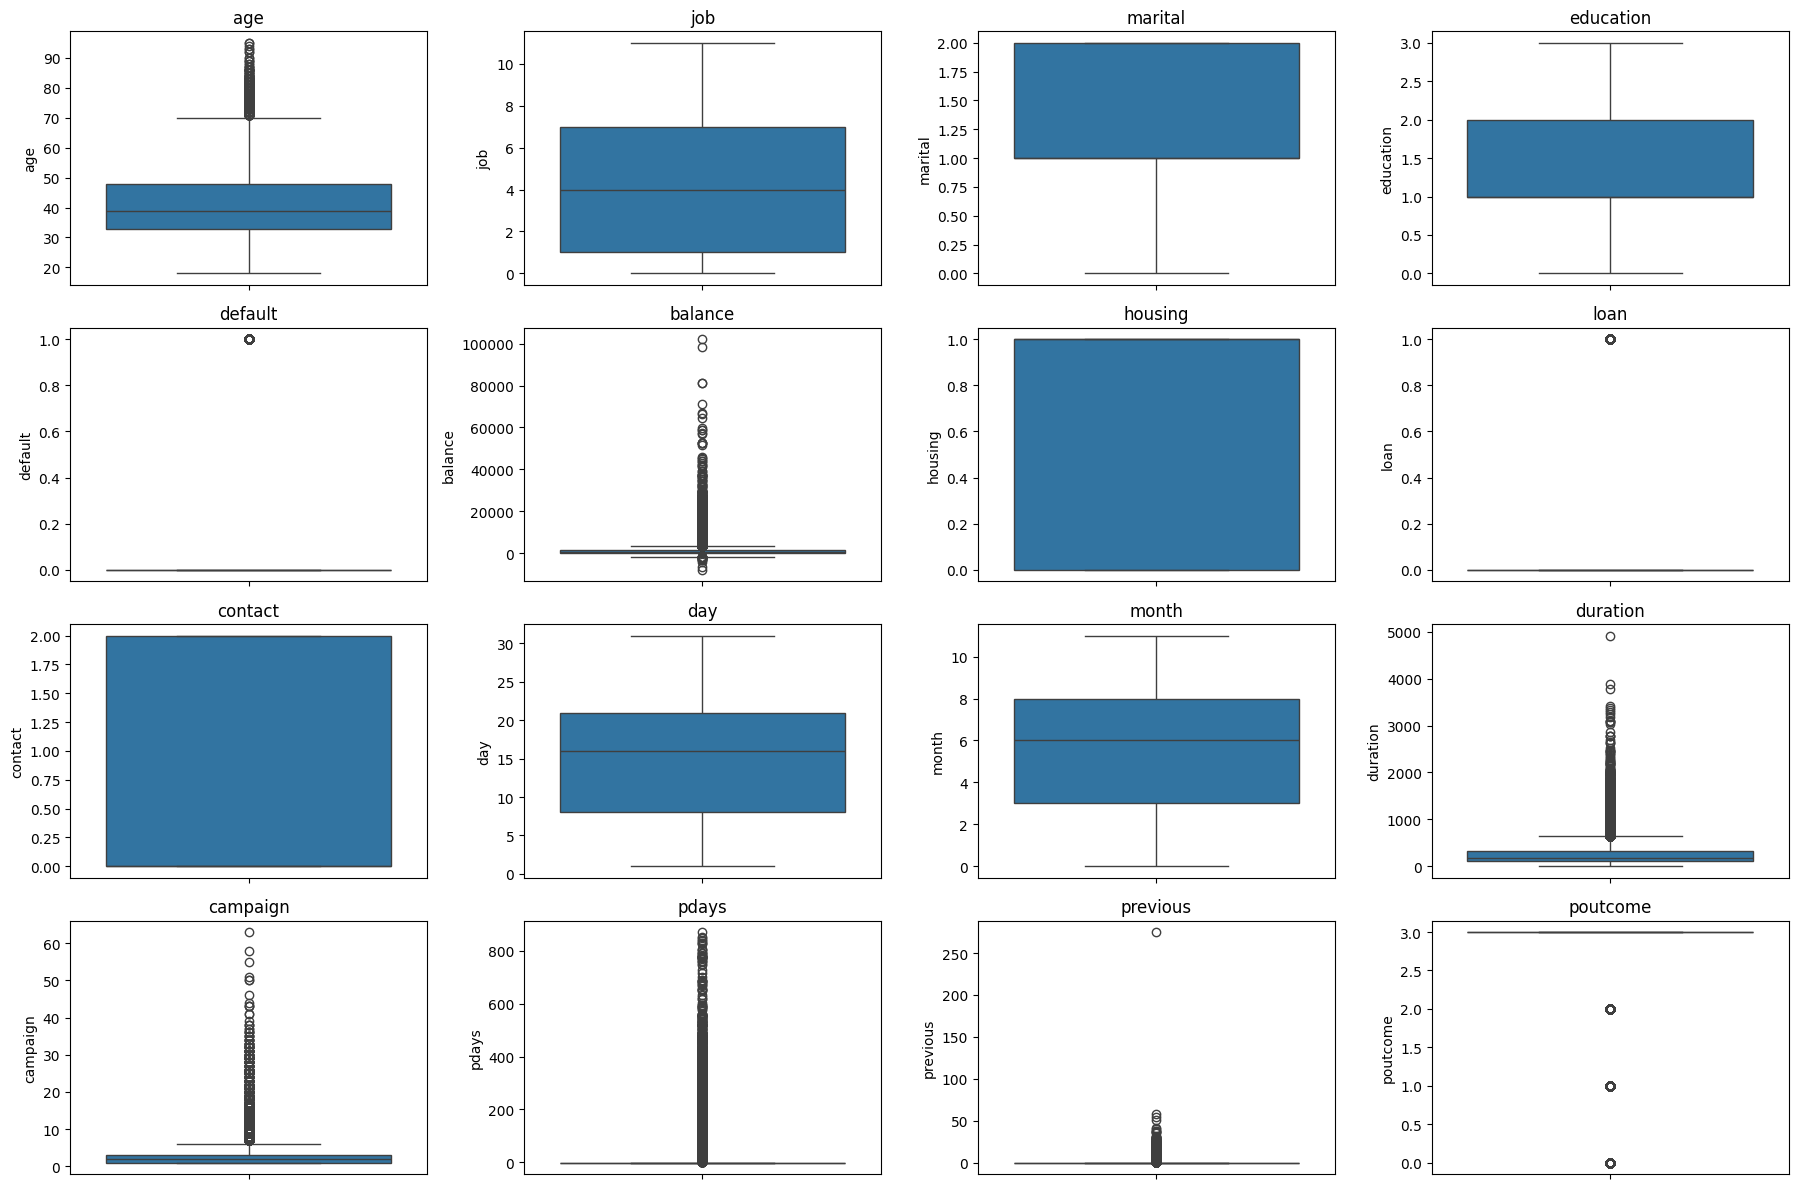

In [ ]:
#extract columns from dataset
features = X_train.columns

fig, axes = plt.subplots(4, 4, figsize=(18, 12))
axes = axes.flatten()

# Plot box plot for each feature in the grid
for i, feature in enumerate(features):
    sns.boxplot(data=X_train[feature], ax=axes[i])
    axes[i].set_title(feature)

for j in range(i+1, len(axes)):
  axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

***From above box-plots for every feature, we can see that every feature has different scale.***

In [ ]:
from sklearn import preprocessing

# Preparing for normalizing
X_train_scaled = X_train
X_test_scaled = X_test
min_max_scaler = preprocessing.MinMaxScaler()
X_train_columns = list(X_train.columns)
X_test_columns = list(X_test.columns)
# # Run the normalizer on the dataframe
X_train_scaled[X_train_columns] = min_max_scaler.fit_transform(X_train[X_train_columns])
X_test_scaled[X_test_columns]= pd.DataFrame(min_max_scaler.fit_transform(X_test[X_test_columns]))

In [ ]:
X_train_scaled.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,0.519481,0.363636,0.5,0.666667,0.0,0.092259,1.0,0.0,1.0,0.133333,0.727273,0.053070,0.0,0.0,0.0,1.0
1,0.337662,0.818182,1.0,0.333333,0.0,0.073067,1.0,0.0,1.0,0.133333,0.727273,0.030704,0.0,0.0,0.0,1.0
2,0.194805,0.181818,0.5,0.333333,0.0,0.072822,1.0,1.0,1.0,0.133333,0.727273,0.015453,0.0,0.0,0.0,1.0
3,0.376623,0.090909,0.5,1.000000,0.0,0.086476,1.0,0.0,1.0,0.133333,0.727273,0.018707,0.0,0.0,0.0,1.0
4,0.194805,1.000000,1.0,1.000000,0.0,0.072812,0.0,0.0,1.0,0.133333,0.727273,0.040260,0.0,0.0,0.0,1.0


In [ ]:
X_test_scaled.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,0.161765,0.909091,0.5,0.000000,0.0,0.068455,0.0,0.0,0.0,0.600000,0.909091,0.024826,0.000000,0.000000,0.00,1.0
1,0.205882,0.636364,0.5,0.333333,0.0,0.108750,1.0,1.0,0.0,0.333333,0.727273,0.071500,0.000000,0.389908,0.16,0.0
2,0.235294,0.363636,1.0,0.666667,0.0,0.062590,1.0,0.0,0.0,0.500000,0.000000,0.059914,0.000000,0.379587,0.04,0.0
3,0.161765,0.363636,0.5,0.666667,0.0,0.064281,1.0,1.0,1.0,0.066667,0.545455,0.064548,0.061224,0.000000,0.00,1.0
4,0.588235,0.090909,0.5,0.333333,0.0,0.044469,1.0,0.0,1.0,0.133333,0.727273,0.073486,0.000000,0.000000,0.00,1.0


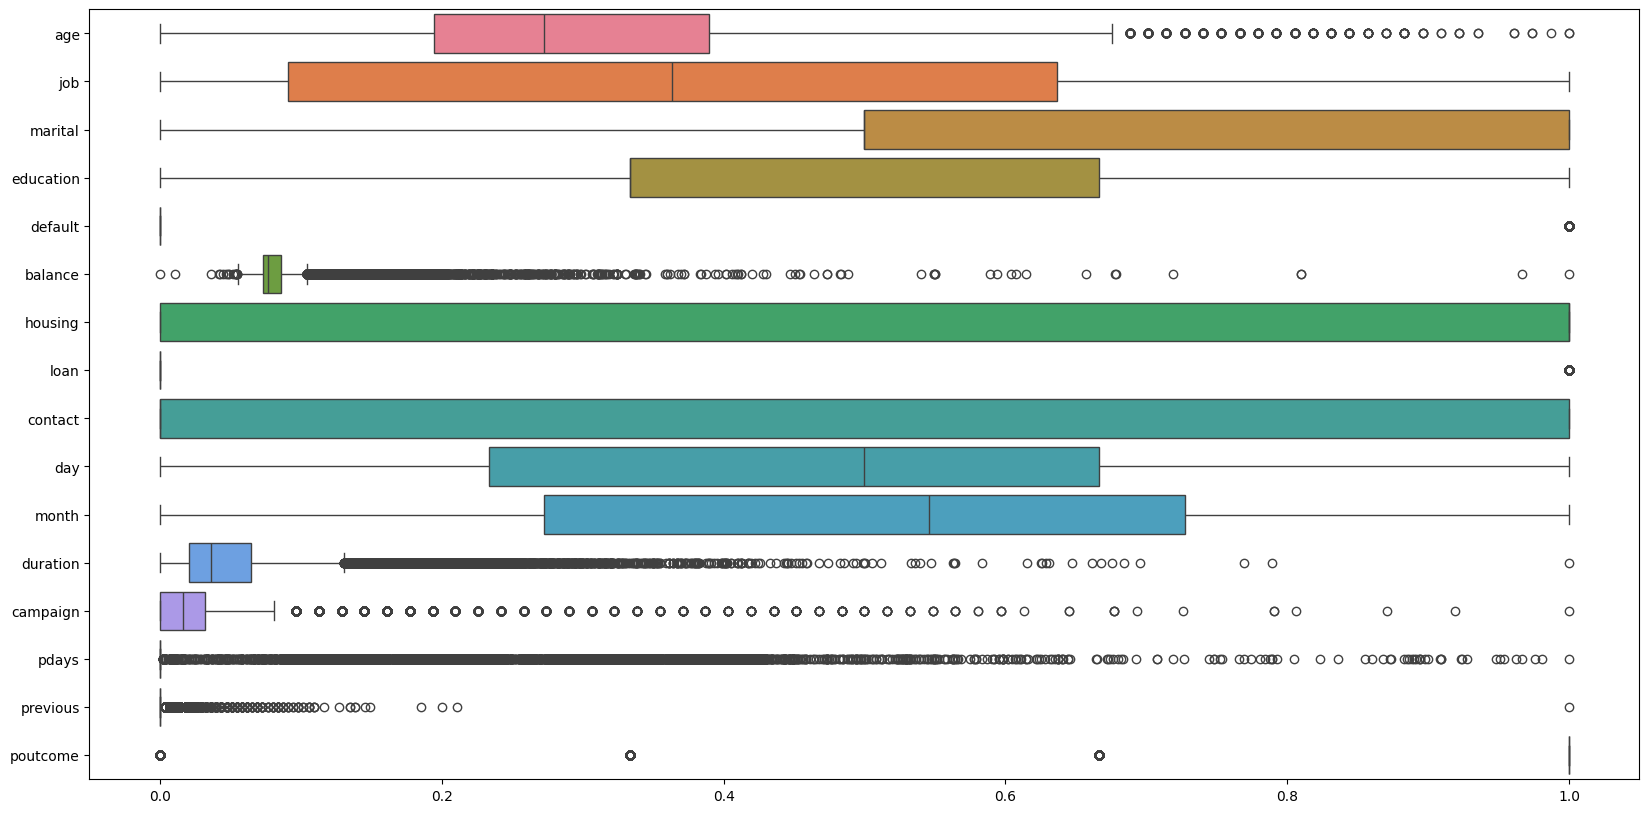

In [ ]:
plt.figure(figsize=(20, 10))  # Adjust the height as needed
sns.boxplot(data=X_train_scaled, orient="h")
plt.show()

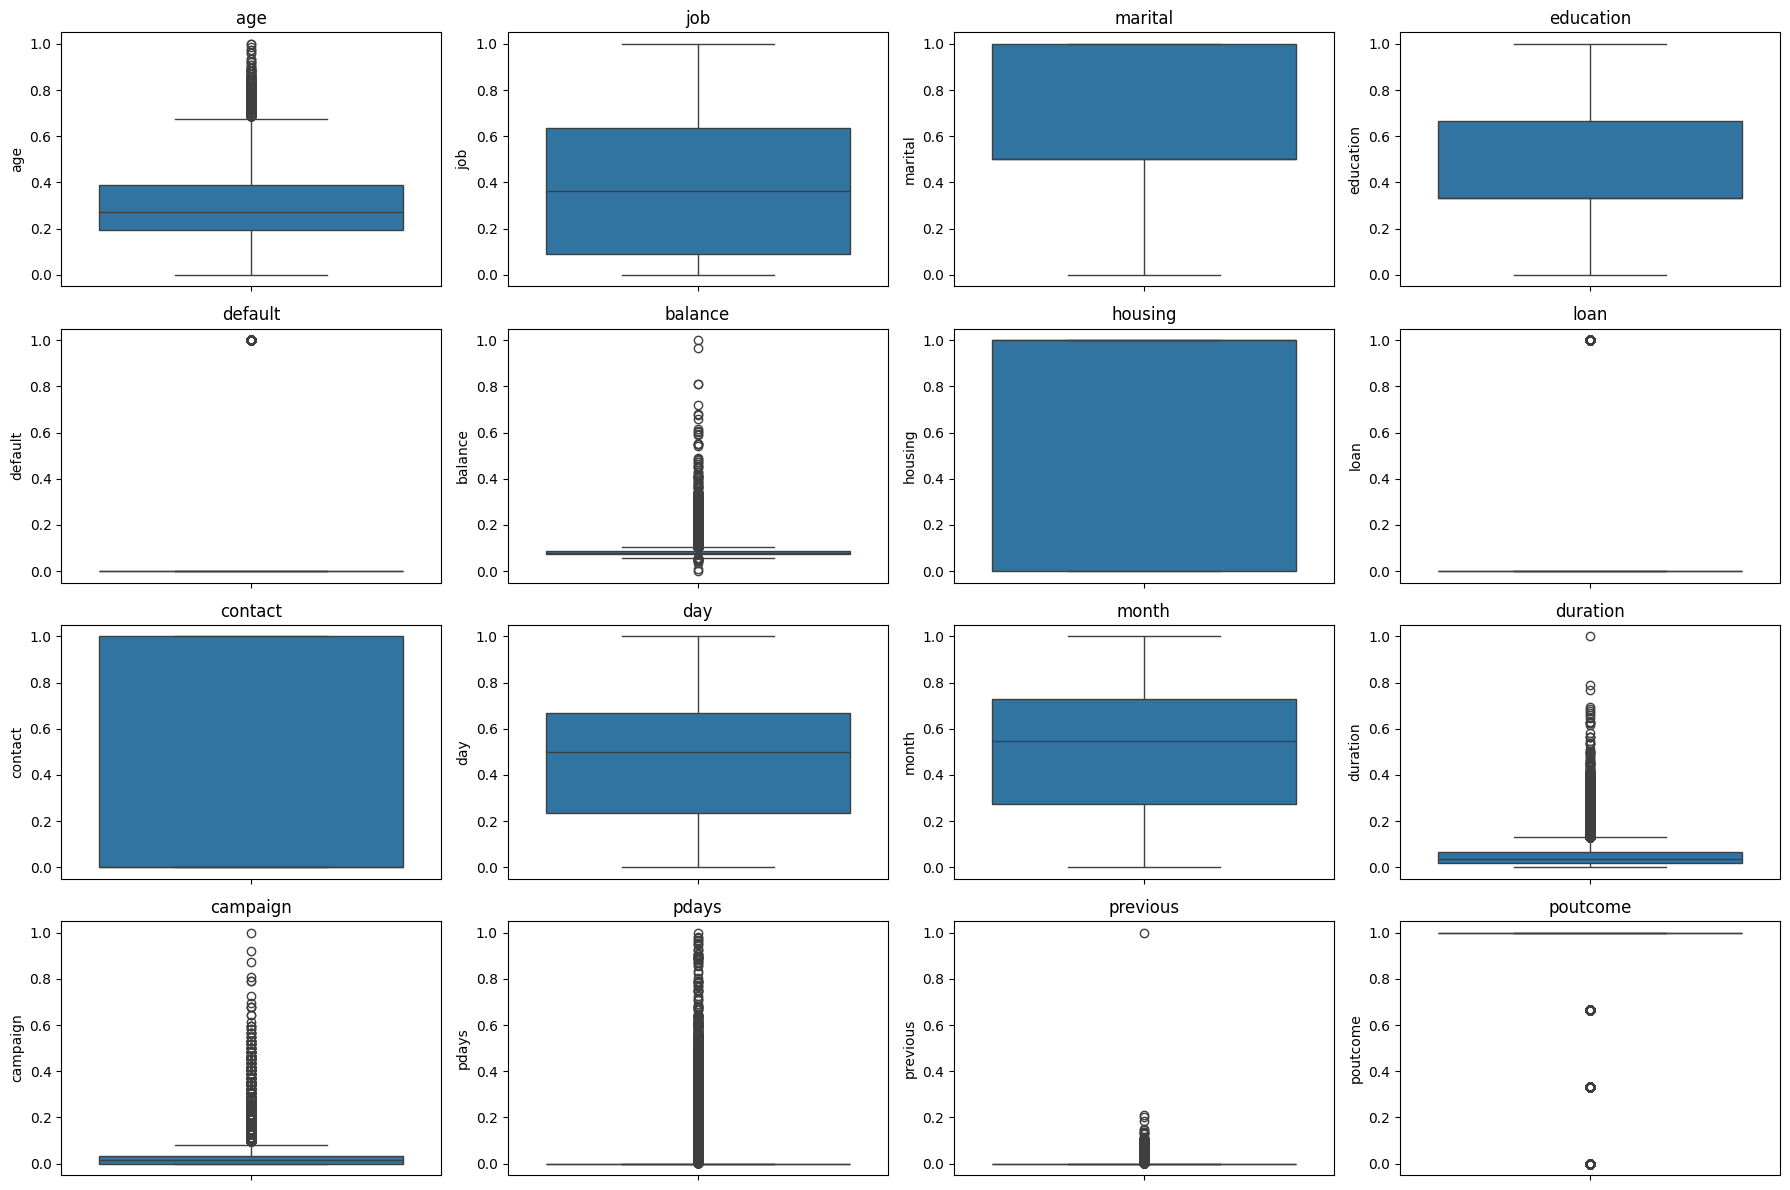

In [ ]:
#extract columns from dataset
features = X_train_scaled.columns

fig, axes = plt.subplots(4, 4, figsize=(18, 12))
axes = axes.flatten()

#Plot box plot for each feature in the grid
for i, feature in enumerate(features):
    sns.boxplot(data=X_train_scaled[feature], ax=axes[i])
    axes[i].set_title(feature)

for j in range(i+1, len(axes)):
  axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

***After performing feature scaling, every feature is scaled between 0 to 1.***


# *Method 1. Correlation*



Removing correlated variables reduces redundancy, making the model more robust and preventing inflated importance of correlated features, which can enhance model performance and interpretation.

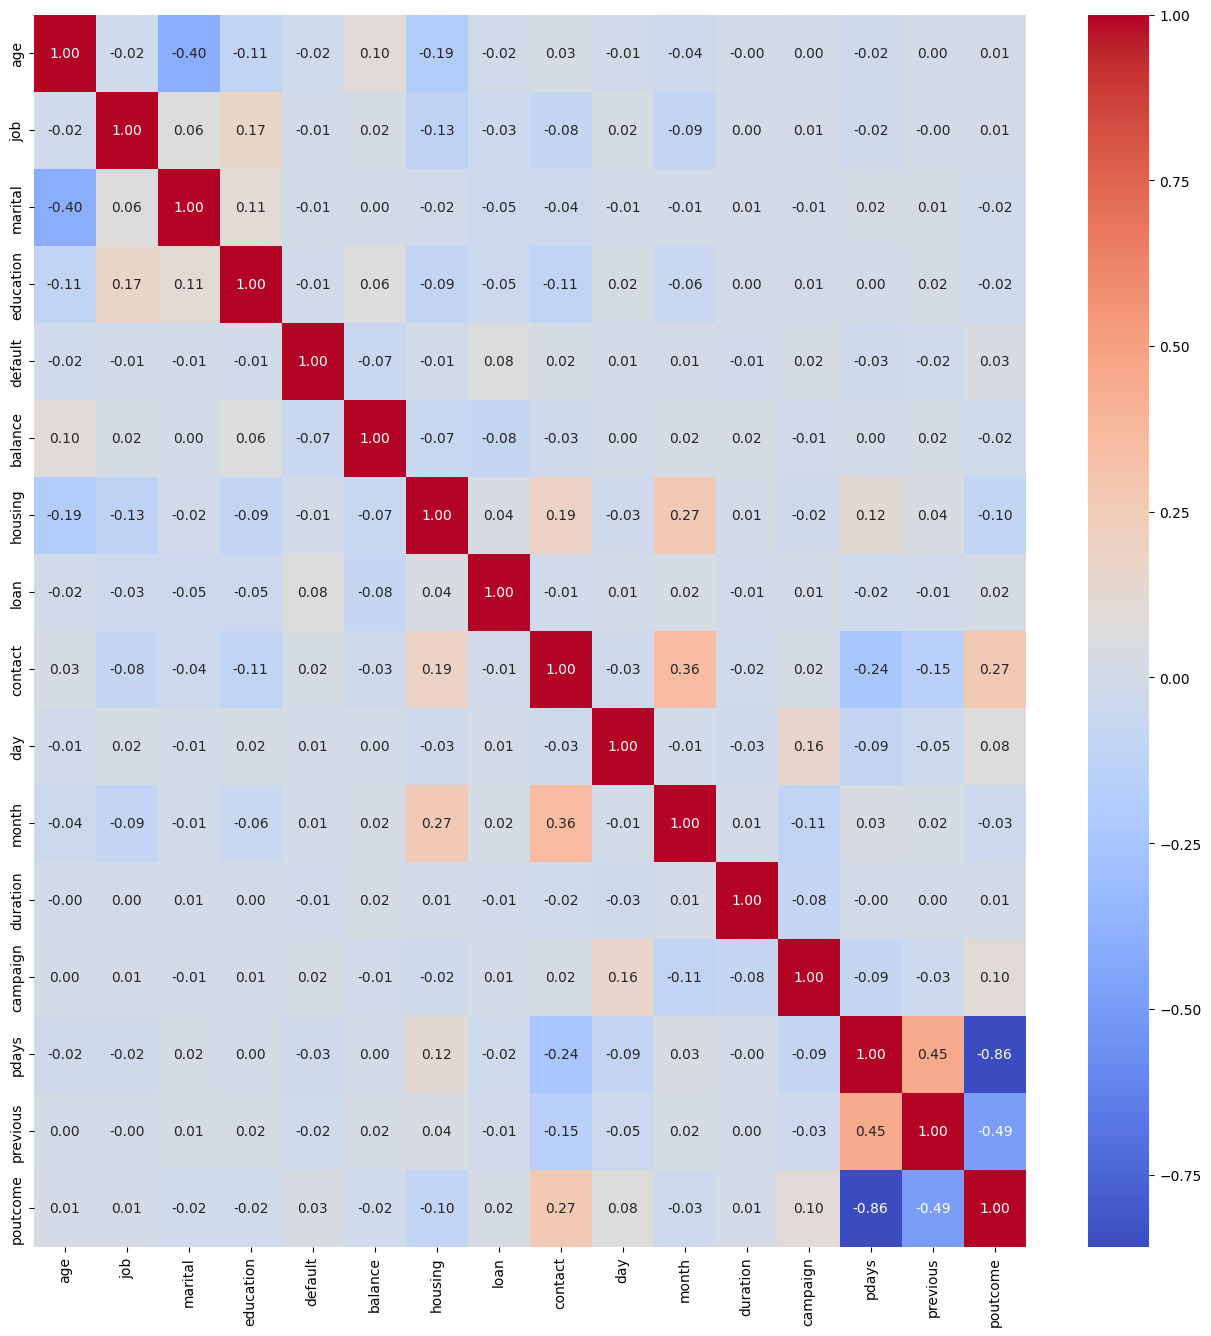

In [ ]:
# Set the figure size
plt.figure(figsize=(16, 16))

correlation_matrix = X_train_scaled.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:#removing feature with absolute value above 0.4
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr


In [ ]:

corr_features_to_be_dropped = correlation(X_train_scaled, 0.4)
corr_features_to_be_dropped


{'marital', 'poutcome', 'previous'}

We can observe that the following columns show high collinearity


*   **'marital'** with **'age'**
*  **'poutcome', 'previous'** with **'pdays'**





In [ ]:
#Thus dropping the columns with high collinearity
X_train_updated = X_train_scaled.drop(corr_features_to_be_dropped, axis=1)
X_train_updated.head()

,age,job,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays
0,0.519481,0.363636,0.666667,0.0,0.092259,1.0,0.0,1.0,0.133333,0.727273,0.053070,0.0,0.0
1,0.337662,0.818182,0.333333,0.0,0.073067,1.0,0.0,1.0,0.133333,0.727273,0.030704,0.0,0.0
2,0.194805,0.181818,0.333333,0.0,0.072822,1.0,1.0,1.0,0.133333,0.727273,0.015453,0.0,0.0
3,0.376623,0.090909,1.000000,0.0,0.086476,1.0,0.0,1.0,0.133333,0.727273,0.018707,0.0,0.0
4,0.194805,1.000000,1.000000,0.0,0.072812,0.0,0.0,1.0,0.133333,0.727273,0.040260,0.0,0.0


# Method 2. Chi2 Test

> The chi-square test evaluates whether the observed distribution of a categorical feature is significantly different from what would be expected if the feature and the target variable were independent. If the observed and expected distributions are significantly different, it implies that the feature is likely informative for predicting the target variable, making it a candidate for feature selection.

> The chi-square test for feature selection is implemented using the SelectKBest class with the chi2 scoring function from sci-kitLearn , enabling the selection of features with significant chi-square statistics for model training.





In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=10)

independent_features = list(X_train_updated.columns)

independent_vars = X_train_updated[independent_features]
dependent_var = y_train

fit = selector.fit(independent_vars, dependent_var)

mask = fit.get_support()
selected_features = X_train_updated[independent_features].columns[mask]

print("Selected Features:", selected_features)

Selected Features: Index(['job', 'education', 'default', 'housing', 'loan', 'contact', 'day',
       'duration', 'campaign', 'pdays'],
      dtype='object')


In [ ]:
X_train_updated = X_train_updated[selected_features]
X_train_updated.head()

,job,education,default,housing,loan,contact,day,duration,campaign,pdays
0,0.363636,0.666667,0.0,1.0,0.0,1.0,0.133333,0.053070,0.0,0.0
1,0.818182,0.333333,0.0,1.0,0.0,1.0,0.133333,0.030704,0.0,0.0
2,0.181818,0.333333,0.0,1.0,1.0,1.0,0.133333,0.015453,0.0,0.0
3,0.090909,1.000000,0.0,1.0,0.0,1.0,0.133333,0.018707,0.0,0.0
4,1.000000,1.000000,0.0,0.0,0.0,1.0,0.133333,0.040260,0.0,0.0


# *Method 3. Variance Threshold*





In [ ]:
X_train_info = X_train_updated.describe()

X_train_info.loc['std', :] = X_train_info.loc['std', :]**2
X_train_info


,job,education,default,housing,loan,contact,day,duration,campaign,pdays
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,0.394524,0.408271,0.018027,0.555838,0.160226,0.320121,0.493547,0.052494,0.028449,0.047245
std,0.088515,0.062167,0.017702,0.246888,0.134557,0.201579,0.076960,0.002742,0.002497,0.013185
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.090909,0.333333,0.000000,0.000000,0.000000,0.000000,0.233333,0.020943,0.000000,0.000000
50%,0.363636,0.333333,0.000000,1.000000,0.000000,0.000000,0.500000,0.036600,0.016129,0.000000
75%,0.636364,0.666667,0.000000,1.000000,0.000000,1.000000,0.666667,0.064864,0.032258,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


***Calculated variance from standard deviation to set the threshold for variance threshold***

In [ ]:
from sklearn.feature_selection import VarianceThreshold

var_thr = VarianceThreshold(threshold = 0.003) #Removing both constant and quasi-constant
var_thr.fit(X_train_updated)

var_thr.get_support()



array([ True,  True,  True,  True,  True,  True,  True, False, False,
        True])

In [ ]:
features_to_be_dropped = [column for column in X_train_updated.columns
          if column not in X_train_updated.columns[var_thr.get_support()]]

for features in features_to_be_dropped:
    print(features)

duration
campaign


***Dropping features with low variance - almost having same values***

In [ ]:
X_train_updated.drop(features_to_be_dropped, axis=1, inplace=True)


In [ ]:
X_train_updated

,job,education,default,housing,loan,contact,day,pdays
0,0.363636,0.666667,0.0,1.0,0.0,1.0,0.133333,0.000000
1,0.818182,0.333333,0.0,1.0,0.0,1.0,0.133333,0.000000
2,0.181818,0.333333,0.0,1.0,1.0,1.0,0.133333,0.000000
3,0.090909,1.000000,0.0,1.0,0.0,1.0,0.133333,0.000000
4,1.000000,1.000000,0.0,0.0,0.0,1.0,0.133333,0.000000
...,...,...,...,...,...,...,...,...
45206,0.818182,0.666667,0.0,0.0,0.0,0.0,0.533333,0.000000
45207,0.454545,0.000000,0.0,0.0,0.0,0.0,0.533333,0.000000
45208,0.454545,0.333333,0.0,0.0,0.0,0.0,0.533333,0.212156
45209,0.090909,0.333333,0.0,0.0,0.0,0.5,0.533333,0.000000


***Ans. Final features that were extracted after applying 3 methods***

In [ ]:
X_train_updated.columns

Index(['job', 'education', 'default', 'housing', 'loan', 'contact', 'day',
       'pdays'],
      dtype='object')

***Q. Which independent variables have missing data? How much?***

> Ans. None of the independent variables have missing data.




In [ ]:
X_train_updated.isnull().sum()

job          0
education    0
default      0
housing      0
loan         0
contact      0
day          0
pdays        0
dtype: int64

***Q. Do the training and test sets have the same data?***
> Ans. Training and test set contains different data with similar distributions


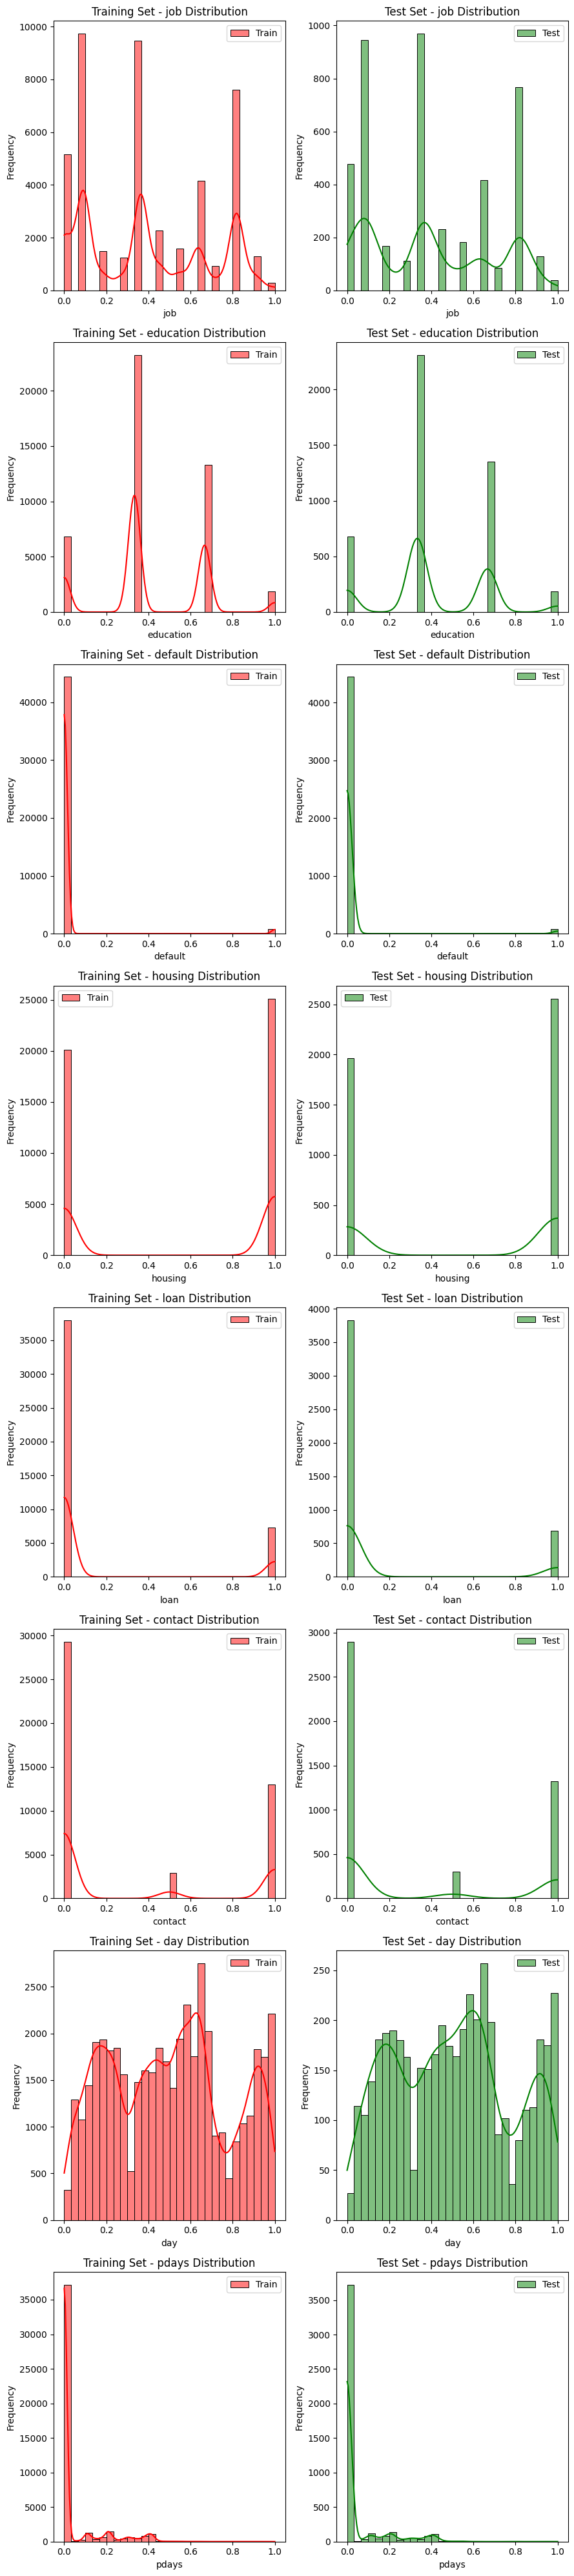

In [ ]:
selected_features = X_train_updated.columns

# Plot histograms and kde for each selected feature
plt.figure(figsize=(9, 5 * len(selected_features)))

for i, feature in enumerate(selected_features, 1):
    plt.subplot(len(selected_features), 2, i*2-1)
    sns.histplot(X_train_updated[feature], bins=30, kde=True, color='red', label='Train')
    plt.title(f'Training Set - {feature} Distribution')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()

    plt.subplot(len(selected_features), 2, i*2)
    sns.histplot(X_test_scaled[feature], bins=30, kde=True, color='green', label='Test')
    plt.title(f'Test Set - {feature} Distribution')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()




***Q. In the predictor variables independent of all the other predictor variables?***


> Ans. No, as we can observe from the heatmap that each predictor variable has some collinearity with every other predictor variable.

Features with collinearity greater than 0.4 as threshold were dropped.






***Q. Which predictor variables are the most important?***


> Ans. Following are the most important
features after passing through feature selection pipeline of collinearity detection, Chi2 test and  variance threshold:

1. pdays  
2. job          
3. education    
4. default      
6. housing      
7. loan         
8. contact      
9. day   
      







In [ ]:
X_train_updated

,job,education,default,housing,loan,contact,day,pdays
0,0.363636,0.666667,0.0,1.0,0.0,1.0,0.133333,0.000000
1,0.818182,0.333333,0.0,1.0,0.0,1.0,0.133333,0.000000
2,0.181818,0.333333,0.0,1.0,1.0,1.0,0.133333,0.000000
3,0.090909,1.000000,0.0,1.0,0.0,1.0,0.133333,0.000000
4,1.000000,1.000000,0.0,0.0,0.0,1.0,0.133333,0.000000
...,...,...,...,...,...,...,...,...
45206,0.818182,0.666667,0.0,0.0,0.0,0.0,0.533333,0.000000
45207,0.454545,0.000000,0.0,0.0,0.0,0.0,0.533333,0.000000
45208,0.454545,0.333333,0.0,0.0,0.0,0.0,0.533333,0.212156
45209,0.090909,0.333333,0.0,0.0,0.0,0.5,0.533333,0.000000


# ***Step 4: Training models***

# **Model 1: Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier1= LogisticRegression(random_state=0)
classifier1.fit(X_train_updated,y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred=classifier1.predict(X_test_scaled[X_train_updated.columns])
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred)
print(cm1)

[[3999    1]
 [ 520    1]]


In [ ]:
X_train_updated.value_counts()

job       education  default  housing  loan  contact  day       pdays   
0.363636  0.666667   0.0      0.0      0.0   0.0      0.900000  0.000000    148
                                                      0.600000  0.000000    133
                              1.0      0.0   0.0      0.566667  0.000000    125
                              0.0      0.0   0.0      0.666667  0.000000    124
                                                      0.566667  0.000000    117
                                                                           ... 
          0.333333   0.0      1.0      0.0   0.0      0.533333  0.294725      1
                                                                0.394495      1
                                                      0.566667  0.111239      1
                                                                0.118119      1
1.000000  1.000000   1.0      0.0      0.0   1.0      0.633333  0.000000      1
Length: 14381, dtype: int64

In [ ]:
y_test.value_counts()

0    4000
1     521
Name: y, dtype: int64


> ***Dataset has a significant class imbalance (which is the case, as the distribution of y_test is 4000 instances of class 0 and 521 instances of class 1), Logistic Regression, being a linear model might struggle to predict the minority class. In this case, it seems that the model has only made one positive prediction.***



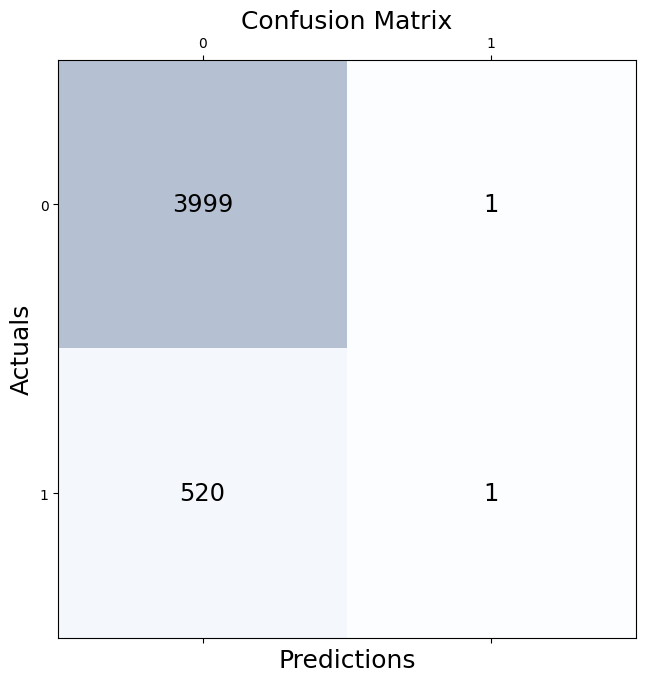

In [ ]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm1, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm1.shape[0]):
    for j in range(cm1.shape[1]):
        ax.text(x=j, y=i,s=cm1[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#y_test and y_pred are the true labels and predicted labels respectively

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


print("Accuracy: ", acc)
print("Precision: ", prec)
print("Recall: ", recall)
print("F1: ", f1)


Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      4000
           1       0.50      0.00      0.00       521

    accuracy                           0.88      4521
   macro avg       0.69      0.50      0.47      4521
weighted avg       0.84      0.88      0.83      4521

Accuracy:  0.8847600088476001
Precision:  0.5
Recall:  0.0019193857965451055
F1:  0.0038240917782026767


# **Model 2: Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train_updated, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred2 = dtc.predict(X_test_scaled[X_train_updated.columns])
y_pred2

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)

[[3990   10]
 [ 295  226]]


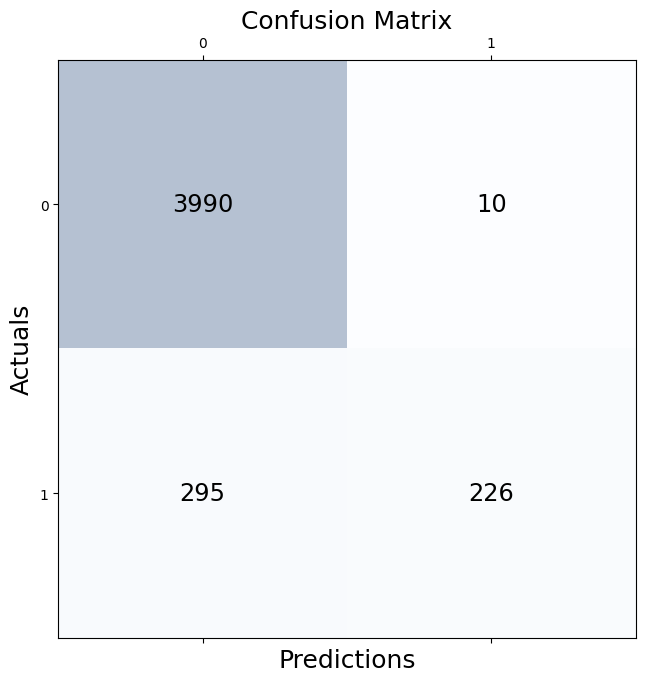

In [ ]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm2, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm2.shape[0]):
    for j in range(cm2.shape[1]):
        ax.text(x=j, y=i,s=cm2[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#y_test and y_pred are the true labels and predicted labels respectively
print("\nClassification Report:")
print(classification_report(y_test, y_pred2))

acc = accuracy_score(y_test, y_pred2)
prec = precision_score(y_test, y_pred2)
recall = recall_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2)

print("Accuracy: ", acc)
print("Precision: ", prec)
print("Recall: ", recall)
print("F1: ", f1)


Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      4000
           1       0.96      0.43      0.60       521

    accuracy                           0.93      4521
   macro avg       0.94      0.72      0.78      4521
weighted avg       0.93      0.93      0.92      4521

Accuracy:  0.9325370493253705
Precision:  0.9576271186440678
Recall:  0.43378119001919385
F1:  0.5970937912813739


# **Model 3: RandomForestClassifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create the RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Fit the model to the data
rf_classifier.fit(X_train_updated, y_train)

# Make predictions
y_pred_rf = rf_classifier.predict(X_test_scaled[X_train_updated.columns])

In [ ]:
# Evaluate the model
acc_best = accuracy_score(y_test, y_pred_rf)
prec_best = precision_score(y_test, y_pred_rf)
recall_best = recall_score(y_test, y_pred_rf)
f1_best = f1_score(y_test, y_pred_rf)


print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


print("Best Accuracy: ", acc_best)
print("Best Precision: ", prec_best)
print("Best Recall: ", recall_best)
print("Best F1: ", f1_best)


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4000
           1       0.91      0.45      0.60       521

    accuracy                           0.93      4521
   macro avg       0.92      0.72      0.78      4521
weighted avg       0.93      0.93      0.92      4521

Best Accuracy:  0.9316522893165229
Best Precision:  0.9140625
Best Recall:  0.4491362763915547
Best F1:  0.6023166023166023


***Q. Do the ranges of the predictor variables make sense?***

Before Feature Scaling and Encoding

In [ ]:
df_train_original.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


After Feature Scaling and Encoding

In [ ]:
X_train_updated.describe()

,job,education,default,housing,loan,contact,day,pdays
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,0.394524,0.408271,0.018027,0.555838,0.160226,0.320121,0.493547,0.047245
std,0.297514,0.249332,0.133049,0.496878,0.366820,0.448975,0.277416,0.114827
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.090909,0.333333,0.000000,0.000000,0.000000,0.000000,0.233333,0.000000
50%,0.363636,0.333333,0.000000,1.000000,0.000000,0.000000,0.500000,0.000000
75%,0.636364,0.666667,0.000000,1.000000,0.000000,1.000000,0.666667,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


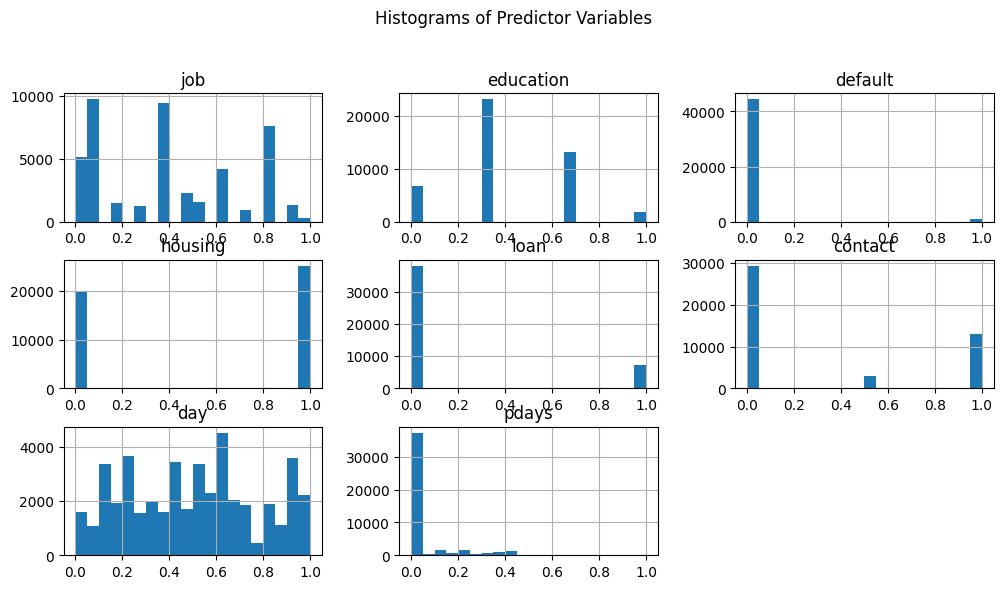

In [ ]:
# Create histograms for each variable
X_train_updated.hist(figsize=(12, 6), bins=20)
plt.suptitle("Histograms of Predictor Variables", y=1.02)
plt.show()


***Q. What are the distributions of the predictor variables?***


> Ans

In the dataset, most predictor variables are categorical in nature and after seeing the Histograms and Anderson Darling test we see that most predictor variables have skewed distributions



# **Remove Outliers**

***Q. :Remove outliers and keep outliers (does if have an effect of the final predictive model)?***

In [ ]:
#Now we will remove the outliers
Q1 = df_train_original.quantile(0.03)
Q3 = df_train_original.quantile(0.97)
#IQR = Q3 - Q1 I tried IQR method but it's returing me with nan, so I opted manually
#to remove outliers less than 5 persentile and more than 95 percentile.

df_train_new = df_train_original[~((df_train_original < (Q1)) |(df_train_original > (Q3))).any(axis=1)]

<ipython-input-64-6ca8ef72d4db>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df_train_original.quantile(0.03)
<ipython-input-64-6ca8ef72d4db>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df_train_original.quantile(0.97)
<ipython-input-64-6ca8ef72d4db>:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_train_new = df_train_original[~((df_train_original < (Q1)) |(df_train_original > (Q3))).any(axis=1)]


In [ ]:
Q1

age          26.0
balance    -322.0
day           2.0
duration     22.0
campaign      1.0
pdays        -1.0
previous      0.0
Name: 0.03, dtype: float64

<ipython-input-66-3b331464f3df>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-ticks')


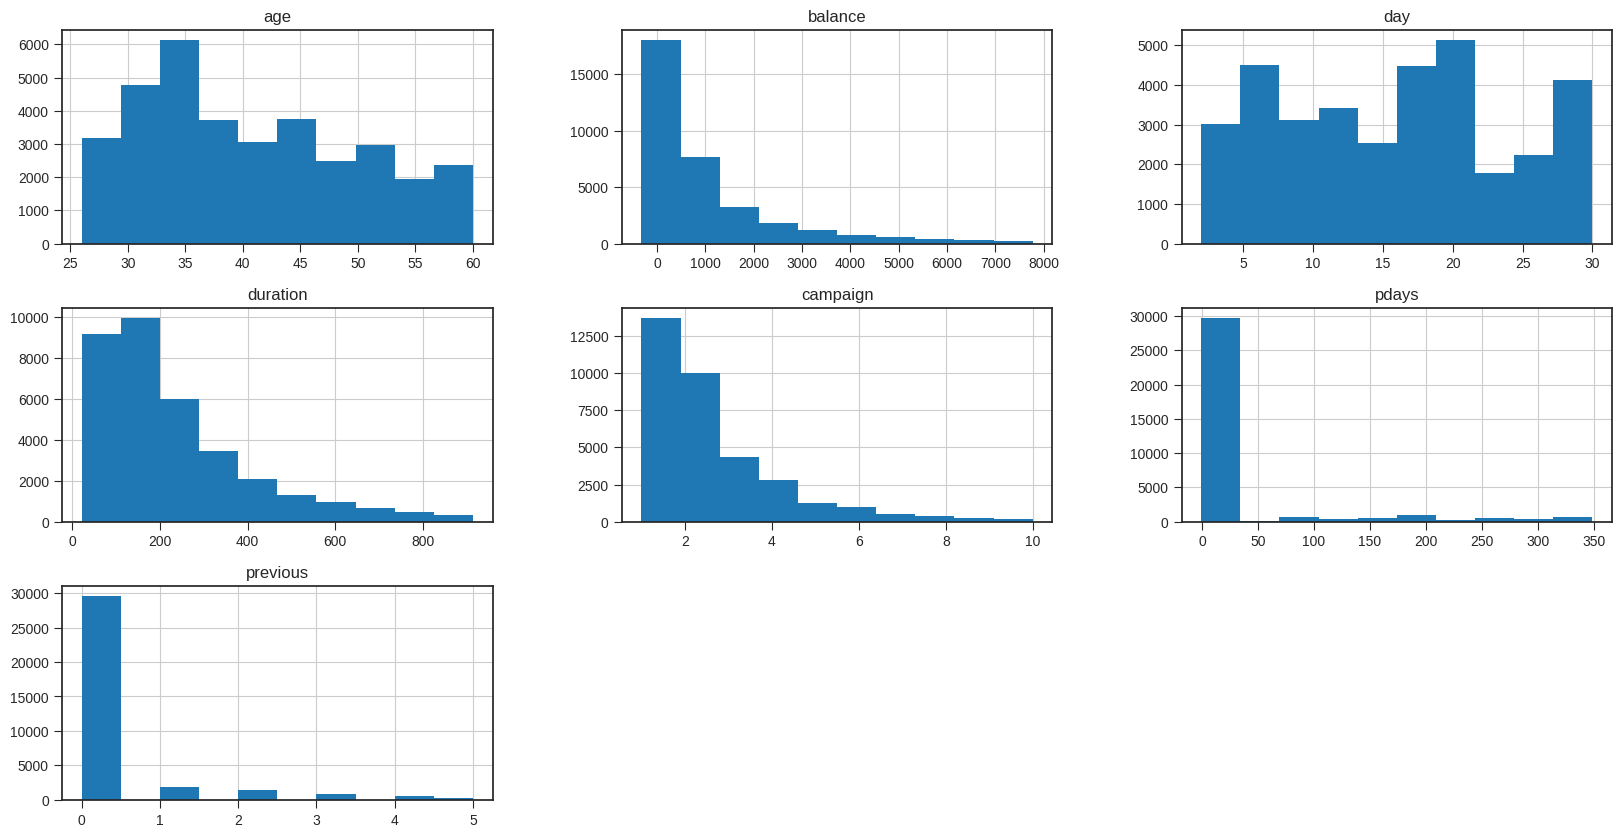

In [ ]:
plt.style.use('seaborn-ticks')
df_train_new.hist(bins=10, figsize=(20,10))
plt.show();

In [ ]:
#Encoded categorial using label encoder technique
label_encoder = LabelEncoder()
df_test_new = df_test.loc[:,:]
categorical_features = df_train_new.select_dtypes('object').columns
for feature in categorical_features:
  df_train_new[feature] = label_encoder.fit_transform(df_train_new[feature])


categorical_features = df_test_new.select_dtypes('object').columns
for feature in categorical_features:
  df_test_new[feature] = label_encoder.fit_transform(df_test_new[feature])



<ipython-input-67-ebad4beb252f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_new[feature] = label_encoder.fit_transform(df_train_new[feature])
<ipython-input-67-ebad4beb252f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_new[feature] = label_encoder.fit_transform(df_train_new[feature])
<ipython-input-67-ebad4beb252f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [ ]:
X1_train = df_train_new.iloc[:, :-1] # from column 1 to second last column[-1] means dropping id and satisfaction column
y1_train = df_train_new.iloc[:, -1] # -1 indicates last column
X1_test = df_test_new.iloc[:,:-1]
y_test = df_test_new.iloc[:, -1]

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create the RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Fit the model to the data
rf_classifier.fit(X1_train[X_train_updated.columns], y1_train)

# Make predictions
y_pred_rf = rf_classifier.predict(X1_test[X_train_updated.columns])

In [ ]:
# Evaluate the model
acc_best = accuracy_score(y_test, y_pred_rf)
prec_best = precision_score(y_test, y_pred_rf)
recall_best = recall_score(y_test, y_pred_rf)
f1_best = f1_score(y_test, y_pred_rf)


print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


print("Best Accuracy: ", acc_best)
print("Best Precision: ", prec_best)
print("Best Recall: ", recall_best)
print("Best F1: ", f1_best)


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      4000
           1       0.77      0.28      0.41       521

    accuracy                           0.91      4521
   macro avg       0.84      0.64      0.68      4521
weighted avg       0.90      0.91      0.89      4521

Best Accuracy:  0.9075425790754258
Best Precision:  0.7696335078534031
Best Recall:  0.2821497120921305
Best F1:  0.41292134831460675



> **Ans. Random Forests are generally robust to the outliers. But if outliers have a significant impact on the target variable, removing them may still lead to improvements. However here the outliers are not affecting the model significantly, so the impact on performance is minimal**




# **Imputation**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error

# Step 1: Remove Random Percentage of Data
np.random.seed(42)
percentage_to_remove = [0.01, 0.05, 0.1]

df = df_train
df_removed_1percent = df.mask(np.random.random(df.shape) < percentage_to_remove[0])
df_removed_5percent = df.mask(np.random.random(df.shape) < percentage_to_remove[1])
df_removed_10percent = df.mask(np.random.random(df.shape) < percentage_to_remove[2])

# Step 2: Imputation Methods
imputation_methods = ['mean', 'median', 'mode']
results = {}

for method in imputation_methods:
    imputer = SimpleImputer(strategy=method)

    df_imputed_1percent = pd.DataFrame(imputer.fit_transform(df_removed_1percent), columns=df.columns)
    df_imputed_5percent = pd.DataFrame(imputer.fit_transform(df_removed_5percent), columns=df.columns)
    df_imputed_10percent = pd.DataFrame(imputer.fit_transform(df_removed_10percent), columns=df.columns)

    # Step 3: Calculate % Error on Residuals
    residuals_1percent = df_imputed_1percent[df.columns] - df[df.columns]
    residuals_5percent = df_imputed_5percent[df.columns] - df[df.columns]
    residuals_10percent = df_imputed_10percent[df.columns] - df[df.columns]

    percentage_error_1percent = np.abs(residuals_1percent) / np.abs(df[df.columns]) * 100
    percentage_error_5percent = np.abs(residuals_5percent) / np.abs(df[df.columns]) * 100
    percentage_error_10percent = np.abs(residuals_10percent) / np.abs(df[df.columns]) * 100

    # Step 4: Check for Bias and Variance of the Error
    bias_1percent = residuals_1percent.mean()
    variance_1percent = residuals_1percent.var()

    bias_5percent = residuals_5percent.mean()
    variance_5percent = residuals_5percent.var()

    bias_10percent = residuals_10percent.mean()
    variance_10percent = residuals_10percent.var()

    results[method] = {
        'percentage_error_1percent': percentage_error_1percent.mean(),
        'bias_1percent': bias_1percent.mean(),
        'variance_1percent': variance_1percent.mean(),

        'percentage_error_5percent': percentage_error_5percent.mean(),
        'bias_5percent': bias_5percent.mean(),
        'variance_5percent': variance_5percent.mean(),

        'percentage_error_10percent': percentage_error_10percent.mean(),
        'bias_10percent': bias_10percent.mean(),
        'variance_10percent': variance_10percent.mean(),
    }



In [ ]:
for method, metrics in results.items():
    print(f"\nResults for Imputation Method: {method}")

    # 1% Removed
    mean_percentage_error_1percent = metrics['percentage_error_1percent'].mean()
    mean_bias_1percent = metrics['bias_1percent'].mean()
    mean_variance_1percent = metrics['variance_1percent'].mean()
    print(f"1% Removed: Mean % Error on Residuals: {mean_percentage_error_1percent:.2f}%")
    print(f"1% Removed: Mean Bias: {mean_bias_1percent:.2f}, Mean Variance: {mean_variance_1percent:.2f}")

    # 5% Removed
    mean_percentage_error_5percent = metrics['percentage_error_5percent'].mean()
    mean_bias_5percent = metrics['bias_5percent'].mean()
    mean_variance_5percent = metrics['variance_5percent'].mean()
    print(f"5% Removed: Mean % Error on Residuals: {mean_percentage_error_5percent:.2f}%")
    print(f"5% Removed: Mean Bias: {mean_bias_5percent:.2f}, Mean Variance: {mean_variance_5percent:.2f}")

    # 10% Removed
    mean_percentage_error_10percent = metrics['percentage_error_10percent'].mean()
    mean_bias_10percent = metrics['bias_10percent'].mean()
    mean_variance_10percent = metrics['variance_10percent'].mean()
    print(f"10% Removed: Mean % Error on Residuals: {mean_percentage_error_10percent:.2f}%")
    print(f"10% Removed: Mean Bias: {mean_bias_10percent:.2f}, Mean Variance: {mean_variance_10percent:.2f}")



Results for Imputation Method: mean
1% Removed: Mean % Error on Residuals: inf%
1% Removed: Mean Bias: 0.01, Mean Variance: 5118.94
5% Removed: Mean % Error on Residuals: inf%
5% Removed: Mean Bias: 0.18, Mean Variance: 21145.94
10% Removed: Mean % Error on Residuals: inf%
10% Removed: Mean Bias: 0.03, Mean Variance: 67534.89

Results for Imputation Method: median
1% Removed: Mean % Error on Residuals: inf%
1% Removed: Mean Bias: -0.54, Mean Variance: 5552.48
5% Removed: Mean % Error on Residuals: inf%
5% Removed: Mean Bias: -2.77, Mean Variance: 23065.59
10% Removed: Mean % Error on Residuals: inf%
10% Removed: Mean Bias: -6.06, Mean Variance: 71964.10


# **Conclusion**


* Decision trees show adaptability within hierarchical structures, **addressing imbalanced classes** to some extent.
* Random forests, as ensembles of decision trees, enhance robustness by **reducing biases** towards the majority class.
* Both decision trees and random forests **exhibit resilience to outliers**, improving their ability to generalize across diverse datasets.
* However, these approaches are not universal remedies for all challenges.
 **Depending on dataset intricacies**, refinement and **additional strategies** may be necessary for optimal model performance in real-world applications.



# **References**

* Scikit learn offcial documentation (https://scikit-learn.org/stable/modules/classes.html)
* Scikit learn Metrics (https://scikit-learn.org/stable/modules/model_evaluation.html)
* Pandas official documentation(https://pandas.pydata.org/docs/reference/index.html)
* Sea born (https://seaborn.pydata.org/api.html)
* Matplotlib (https://matplotlib.org/stable/api/index.html#)

Copyright 2024 Manashree Patel

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.